In [4]:
%pip install mcap mcap-ros2-support

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement mcap_ros2 (from versions: none)
ERROR: No matching distribution found for mcap_ros2
Note: you may need to restart the kernel to use updated packages.


/limo/depth_camera_link/depth/image_raw sensor_msgs/msg/Image [1701259030614958885]: 640, 480, 32FC1
0.24171937 100.0

/limo/depth_camera_link/image_raw sensor_msgs/msg/Image [1701259030641568494]: 640, 480, rgb8
13 255



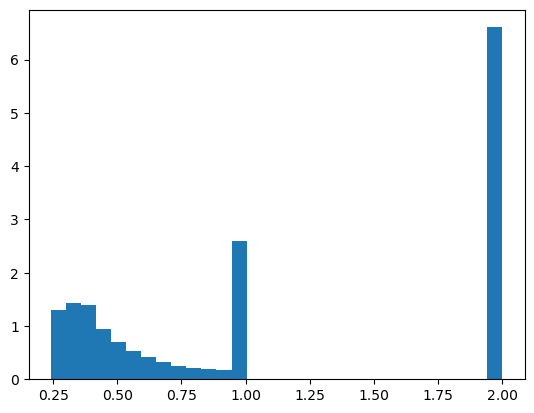

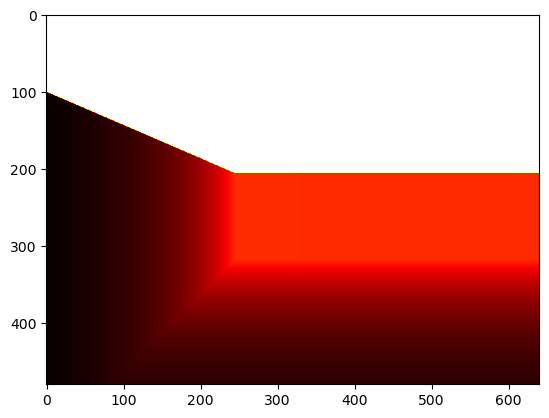

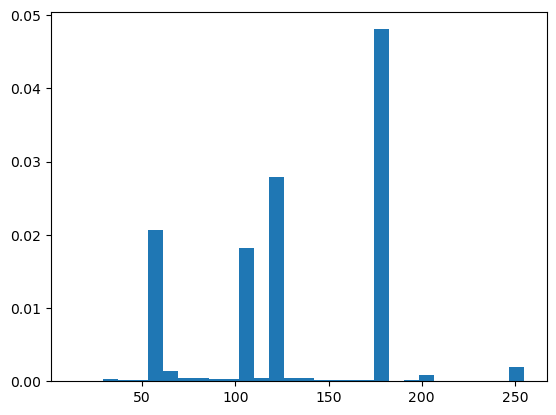

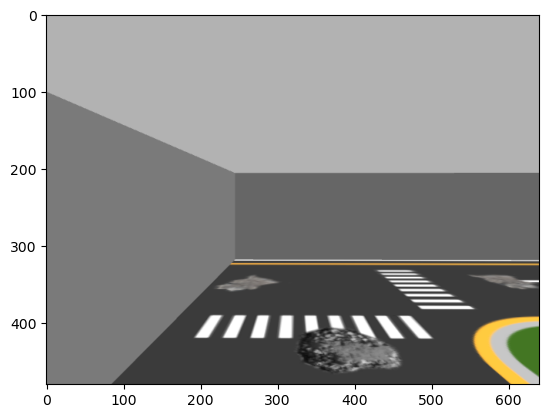

In [38]:
import sys

from mcap_ros2.decoder import DecoderFactory
from mcap.reader import make_reader
from matplotlib import pyplot as plt
import numpy as np
import io
from PIL import Image

with open("../../../rosbags/rosbag2_2023_11_29-11_57_09/rosbag2_2023_11_29-11_57_09_0.mcap", "rb") as f:
    reader = make_reader(f, decoder_factories=[DecoderFactory()])

    count = 1
    topics = ["/limo/depth_camera_link/depth/image_raw", "/limo/depth_camera_link/image_raw"]
    for schema, channel, message, ros_msg in reader.iter_decoded_messages(topics=topics):
        print(f"{channel.topic} {schema.name} [{message.log_time}]: {ros_msg.width}, {ros_msg.height}, {ros_msg.encoding}")

        encoding = "RGB"
        if ros_msg.encoding == "32FC1":
            encoding = "F"
        image = Image.frombytes(encoding, (ros_msg.width, ros_msg.height), ros_msg.data)
        # with io.BytesIO(ros_msg.data) as fd:
        #     img = plt.imread(fd, format="raw")
        image_array = np.array(image)
        print(np.min(image_array), np.max(image_array))
        if encoding == "F":
            for i in range(ros_msg.height):
                for j in range(ros_msg.width):
                    if image_array[i][j] == 100.0:
                        image_array[i][j] = 2
        image = Image.fromarray(image_array)
        
        # the histogram of the data

        plt.figure()
        n, bins, patches = plt.hist(image_array.flatten(), 30, density=True)
        plt.figure()
        plt.imshow(image_array, cmap='hot')
        print()

        if count == 2:
            break

        count += 1


In [40]:
with open("../../../rosbags/rosbag2_2023_11_29-11_57_09/rosbag2_2023_11_29-11_57_09_0.mcap", "rb") as f:
    reader = make_reader(f, decoder_factories=[DecoderFactory()])

    count = 1
    topics = ["/limo/depth_camera_link/points"]
    for schema, channel, message, ros_msg in reader.iter_decoded_messages(topics=topics):
        print(f"{channel.topic} {schema.name} [{message.log_time}]: {ros_msg.width}, {ros_msg.height}, {ros_msg.fields}")
        
        point_cloud = np.zeros([ros_msg.height, ros_msg.width, 3])
        if count == 2:
            break

        count += 1
        

/limo/depth_camera_link/points sensor_msgs/msg/PointCloud2 [1701259030754386836]: 307200, 1, [PointField(name=x, offset=0, datatype=7, count=1), PointField(name=y, offset=4, datatype=7, count=1), PointField(name=z, offset=8, datatype=7, count=1), PointField(name=rgb, offset=16, datatype=7, count=1)]
/limo/depth_camera_link/points sensor_msgs/msg/PointCloud2 [1701259031641932372]: 307200, 1, [PointField(name=x, offset=0, datatype=7, count=1), PointField(name=y, offset=4, datatype=7, count=1), PointField(name=z, offset=8, datatype=7, count=1), PointField(name=rgb, offset=16, datatype=7, count=1)]
